# Proyecto final Coderhouse
Analisis de dataset de Santander
https://www.kaggle.com/datasets/lakshmi25npathi/santander-customer-transaction-prediction-dataset

In [265]:
import pandas as pd # Python library for data analysis and data frame
import numpy as np # Numerical Python library for linear algebra and computations
pd.set_option('display.max_columns', None) # code to display all columns
import heapq

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import date, datetime # for manupulating time and date columns

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler # For handling categorical column and scaling numeric columns

# Libraries for clustering and evaluation
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [204]:
#Read the file
df=pd.read_csv("train.csv", sep=",", index_col="ID_code")
df.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
ID_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.

In [205]:
#How long data is?
df.shape

(200000, 201)

In [206]:
#Take samples of the data
df.sample(10)

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
ID_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
train_155076,0,10.5743,-6.3540,16.9008,9.6476,9.4239,-13.8668,3.9795,13.7857,4.0745,6.6094,0.3062,-8.8114,13.7185,1.9824,4.4806,14.1235,10.2790,5.0587,6.3597,13.4384,13.5832,23.5663,1.0084,3.3398,12.2417,13.8672,-8.1489,-3.3022,4.8515,10.6353,-15.4772,11.2906,-1.0883,12.5161,11.6752,8.2958,-2.1157,4.8982,1.4011,-3.1149,10.3831,11.1435,11.0323,11.6073,9.6737,-29.4342,8.1282,-17.7804,17.8039,21.5668,12.6645,15.2346,-2.3235,5.8447,7.9265,2.6649,14.9167,6.3742,5.4267,9.1407,7.3953,-13.8440,1.2466,-3.5536,5.3905,3.2933,5.1394,25.1740,5.0141,-9.9767,6.0212,1.3051,2.9965,15.7736,43.8970,10.2418,15.7085,13.2667,7.5094,13.7820,-10.9391,10.5143,-0.7320,6.7809,-1.4653,12.8194,-5.5525,5.0600,11.4583,7.3381,-1.5055,7.0541,13.2247,10.7673,16.9230,-0.3930,19.9927,11.1737,1.7786,-1.5063,2.9265,23.4441,23.7263,1.5667,10.9796,5.2048,10.7330,15.7623,14.4993,13.8354,2.8727,6.4795,0.5813,10.4575,3.4726,0.0135,1.4929,27.8666,-0.7001,3.5512,35.5646,10.7300,-2.5746,4.0202,-3.0123,12.0681,14.3619,1.3641,-3.9242,12.3224,12.0173,0.9181,8.6243,6.7131,-3.0845,-14.8835,46.8996,18.9103,9.9946,2.4539,2.3773,-1.7863,23.1197,5.3871,7.3430,1.6162,14.3196,0.8315,4.0204,3.2675,14.4897,14.7119,6.5401,17.1169,9.4946,2.5909,13.7594,-11.3140,9.0852,8.5559,22.4508,5.8984,6.8564,8.9807,-10.6963,25.4234,2.3962,0.1439,3.3310,6.0065,-6.5721,-5.0817,19.9551,10.9407,11.2854,9.0447,-7.1769,14.6243,7.5029,4.2195,-11.5459,9.5368,-7.3181,13.9357,8.5066,-6.5177,15.7049,-15.7951,13.6170,1.8663,6.4446,4.1101,3.8026,-0.5007,21.1146,-0.9758,-1.2078,10.0958,15.7241,-13.1653
train_53682,0,15.7189,-1.4280,11.8457,5.4664,8.1500,-11.7036,6.6943,16.5085,3.1746,9.3331,-1.4326,1.1287,13.9527,5.7440,7.2116,15.0805,10.7687,-7.6121,30.3719,18.9538,12.6308,9.3382,0.5355,3.1450,13.7909,13.3592,1.1352,0.3158,5.4505,8.9876,-9.6246,8.8811,1.9503,21.1232,12.4416,7.6309,5.1794,2.9845,2.9723,-2.9440,-13.3421,11.0500,11.7264,11.2809,10.2573,-2.3026,9.3375,-1.5393,8.7163,4.4895,11.9669,10.1603,-6.9713,5.5475,1.0866,16.6458,15.5404,7.7431,10.3821,7.8341,8.0994,-7.8467,0.2204,5.4406,8.1485,8.8430,4.2044,14.2260,5.0086,-5.0255,33.6120,0.6595,5.1554,19.7012,35.9491,15.3033,-7.8826,24.7375,3.0404,13.6506,9.8466,13.4783,-3.5577,-0.5163,-1.4155,14.1165,18.7627,2.8779,9.0410,-1.5139,-29.4624,6.9941,21.0604,10.1205,13.3836,0.7768,20.9059,

In [207]:
#Information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, train_0 to train_199999
Columns: 201 entries, target to var_199
dtypes: float64(200), int64(1)
memory usage: 308.2+ MB


In [208]:
#Validate if there is null
r=df.isnull().sum()
for i in r:
    if i !=0:
        print(i)

In [209]:
#How data look like
df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2000

In [210]:
#Is there any duplicate?
df.duplicated().sum()

0

In [211]:
#Validate types
df.dtypes

target       int64
var_0      float64
var_1      float64
var_2      float64
var_3      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 201, dtype: object

#Drop unless values

In [212]:
df_values=df.drop("target", axis=1)
df_values

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
ID_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
train_0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
train_1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,

In [213]:
correlations=df.corr()
correlations

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
target,1.000000,0.052390,0.050343,0.055870,0.011055,0.010915,0.030979,0.066731,-0.003025,0.019584,-0.042805,-0.002213,0.022993,-0.069489,-0.055156,-0.006332,0.017283,0.008117,0.000864,0.043479,0.011291,-0.018329,-0.058483,0.060558,-0.025473,0.028477,0.013328,0.062422,-0.000582,-0.023942,0.004682,0.000638,-0.025619,0.030513,-0.044334,-0.052692,0.036567,-0.038397,0.007685,0.000970,-0.004090,0.049530,-0.001298,-0.008365,-0.028557,-0.049039,-0.020065,0.005690,0.008983,0.032334,0.030612,-0.013900,0.025992,0.027754,0.063399,-0.015796,0.017176,-0.035000,-0.015468,-0.024277,-0.010448,0.006265,0.007407,0.013888,-0.014670,-0.013805,0.011214,0.023114,0.044673,-0.011957,0.008283,0.026748,0.033607,-0.013005,-0.006460,0.019926,-0.038081,-0.061917,-0.017459,0.048245,0.007591,-0.057609,-0.080917,0.022574,-0.020528,0.012363,-0.024513,-0.039126,-0.035860,-0.020677,0.039369,0.029395,0.040127,-0.046295,-0.035070,0.046296,0.038531,0.003037,0.015224,-0.004074,0.058367,0.002215,-0.009138,-0.018329,-0.001395,-0.026605,0.025604,0.032947,-0.039997,-0.044791,-0.049926,0.064275,0.026686,0.023694,-0.013681,-0.026266,-0.050174,-0.023448,0.002591,0.040358,0.030975,-0.010895,-0.039788,-0.042461,-0.040291,0.004218,0.028223,0.001393,-0.039125,0.026909,-0.005880,0.029917,-0.032380,-0.024510,0.054548,0.017213,0.027944,-0.003554,0.027190,0.018328,-0.074080,0.015301,-0.029701,-0.018901,-0.011202,0.021208,0.030917,-0.063644,0.040280,-0.055011,-0.047319,-0.025821,0.027524,-0.010773,-0.007103,-0.046106,0.037240,-0.020997,0.032642,-0.003817,0.015278,-0.005135,0.004168,0.032647,0.031811,0.040997,-0.055734,-0.057773,0.030797,0.014115,-0.048382,0.047973,0.014873,-0.037976,0.042022,-0.061669,0.021692,0.007469,-0.036863,-0.019681,0.050002,0.031190,0.013714,-0.007198,-0.005467,0.048315,0.000053,-0.030421,0.014873,-0.034015,0.009212,0.055973,0.047114,-0.042858,-0.017709,-0.022838,0.028285,0.023608,-0.035303,-0.053000,0.025434
var_0,0.052390,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,0.006983,0.002429,0.004962,-0.002613,0.000355,0.003468,-0.001996,-0.002717,-0.004584,-0.000043,0.001112,-0.001664,0.004292,0.001505,-0.000932,0.000781,0.002322,-0.000987,0.003658,0.001158,0.006117,0.000985,0.001081,-0.000426,0.003187,-0.002097,0.000274,-0.003343,-0.003933,0.001469,-0.002556,-0.000253,-0.000470,-0.001409,0.006798,0.001152,-0.000440,0.002685,-0.003003,-0.001539,0.000129,0.004062,0.003767,0.000524,-0.004678,0.001217,0.003037,0.001259,-0.000783,-0.001055,-0.000318,-0.003824,-0.002385,-0.001962,0.002243,

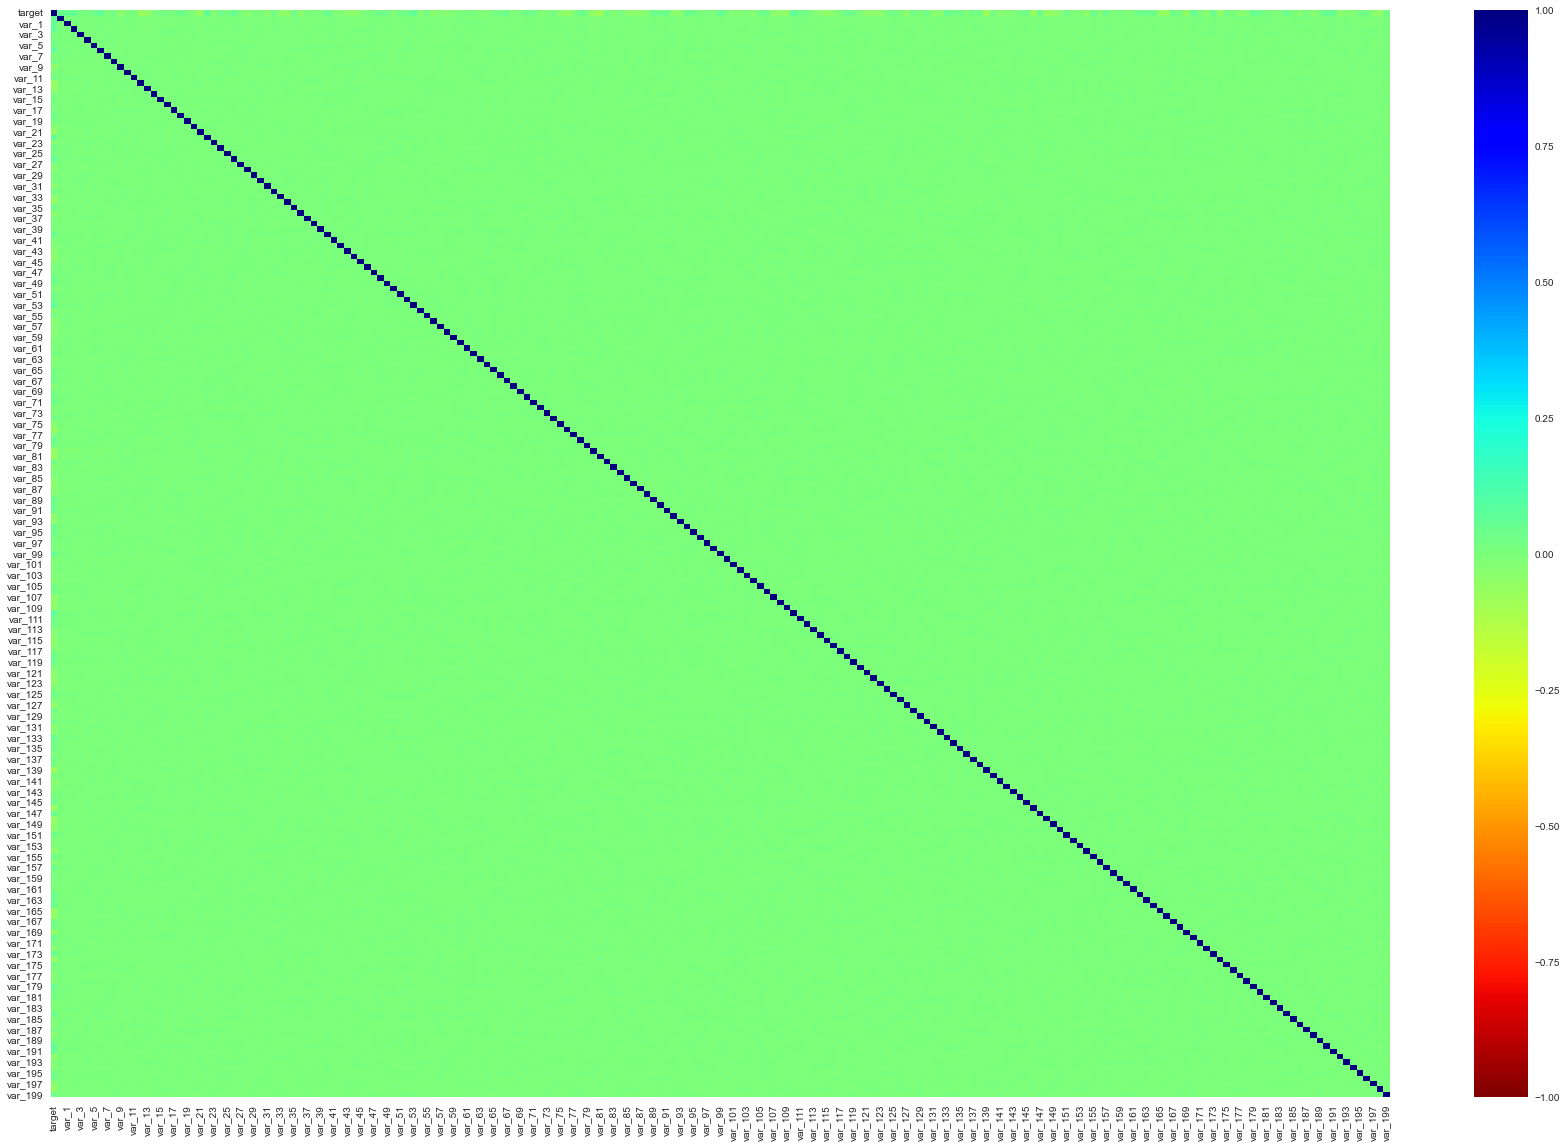

In [214]:
plt.figure(figsize=(30,20))
sns.heatmap(correlations, vmin=-1, vmax=1, cmap='jet_r')
plt.show()

# Analisis de outliers


In [215]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Analisis Univariado

### Comenzaré grafiando algunas variables al azar

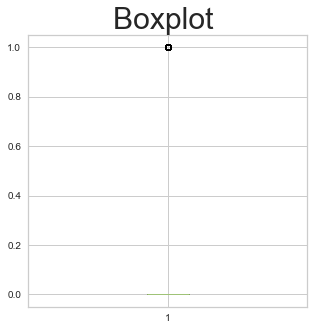

In [216]:
plt.figure(figsize=(5,5))
plt.boxplot(df["target"])
plt.title("Boxplot ", fontsize=30)
plt.show()

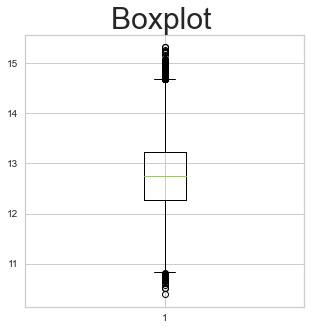

In [217]:
plt.figure(figsize=(5,5))
plt.boxplot(df["var_50"])
plt.title("Boxplot ", fontsize=30)
plt.show()

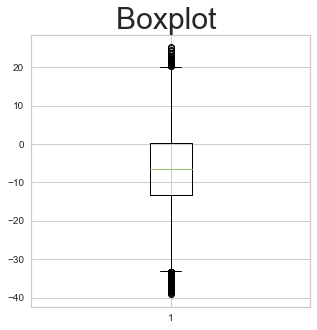

In [218]:
plt.figure(figsize=(5,5))
plt.boxplot(df["var_100"])
plt.title("Boxplot ", fontsize=30)
plt.show()

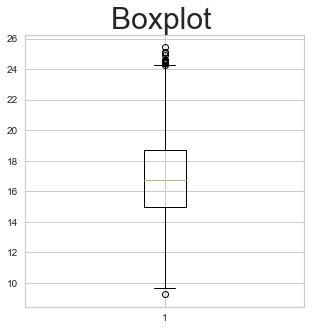

In [219]:
plt.figure(figsize=(5,5))
plt.boxplot(df["var_150"])
plt.title("Boxplot ", fontsize=30)
plt.show()

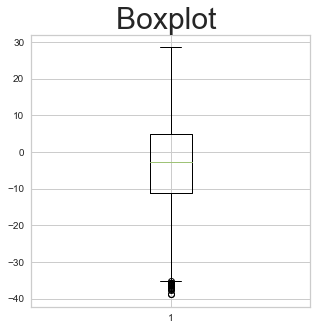

In [220]:
plt.figure(figsize=(5,5))
plt.boxplot(df["var_199"])
plt.title("Boxplot ", fontsize=30)
plt.show()

## Vemos que todos los boxplot realizados tienen outliers, se buscará las variables con mayor cantiadad de outliers para graficarlas. 
## Haremos el Analisis Interquartil

In [221]:
Q1=df.quantile(0.25) #Cuartil 25
Q3=df.quantile(0.75) #Cuartil 75
IQR=Q3-Q1

In [222]:
L_BOUND= Q1-1.5*IQR #limite inferiror
H_BOUND= Q3+1.5*IQR #limite superior

In [223]:
columns=list(df.columns)
lista=list(range(0,200)) #Genero lista para iterar

In [236]:
#Calculo los outliers por variable, y saco el indice del mayor
outliers=[]
max_value=-1
column=-1
for i in lista:
    a=len(df[(((df[columns[i]]) < L_BOUND[i])| ((df[columns[i]]) > H_BOUND[i]))])
    outliers.append(a)
    if max_value<a:
        max_value=a
        column=i

In [240]:
outliers.sort(reverse=True) #Ordeno para ver los mayores valores
outliers

[20098,
 1509,
 1208,
 889,
 804,
 733,
 637,
 589,
 572,
 502,
 498,
 470,
 465,
 461,
 446,
 432,
 413,
 401,
 397,
 397,
 383,
 353,
 331,
 325,
 323,
 313,
 309,
 289,
 286,
 279,
 275,
 268,
 263,
 254,
 254,
 251,
 241,
 239,
 233,
 231,
 228,
 222,
 221,
 198,
 193,
 190,
 188,
 187,
 186,
 178,
 177,
 177,
 176,
 172,
 169,
 163,
 162,
 158,
 154,
 152,
 152,
 150,
 148,
 146,
 145,
 144,
 132,
 131,
 131,
 129,
 128,
 125,
 122,
 113,
 109,
 107,
 104,
 104,
 96,
 96,
 95,
 94,
 92,
 90,
 88,
 85,
 84,
 80,
 80,
 76,
 70,
 68,
 66,
 58,
 56,
 53,
 51,
 49,
 49,
 48,
 47,
 43,
 43,
 42,
 41,
 41,
 40,
 39,
 39,
 38,
 38,
 37,
 36,
 35,
 34,
 34,
 32,
 30,
 30,
 28,
 27,
 27,
 27,
 24,
 23,
 23,
 23,
 22,
 22,
 22,
 22,
 22,
 19,
 17,
 17,
 16,
 15,
 15,
 15,
 15,
 15,
 15,
 14,
 13,
 12,
 11,
 11,
 10,
 9,
 8,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0

#### Obtengo indice de los tres primeros para graficar boxplot


In [237]:
max_0=outliers.index(20098)
max_1=outliers.index(1509)
max_2=outliers.index(1208)
print(max_0,max_1,max_2)

0 180 45


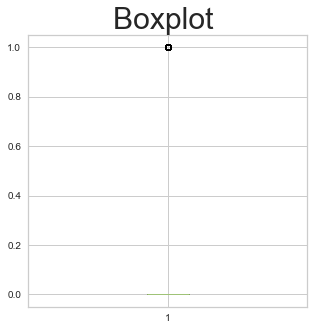

In [228]:
plt.figure(figsize=(5,5))
plt.boxplot(df["target"])
plt.title("Boxplot ", fontsize=30)
plt.show()

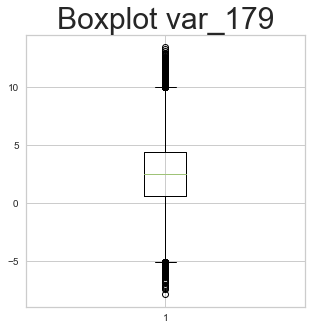

In [229]:
plt.figure(figsize=(5,5))
plt.boxplot(df["var_179"])
plt.title("Boxplot var_179", fontsize=30)
plt.show()

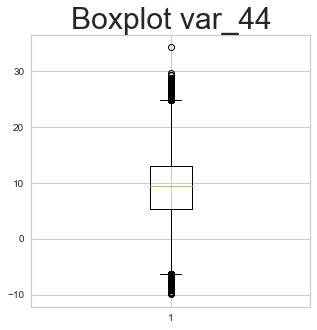

In [230]:
plt.figure(figsize=(5,5))
plt.boxplot(df["var_44"])
plt.title("Boxplot var_44", fontsize=30)
plt.show()

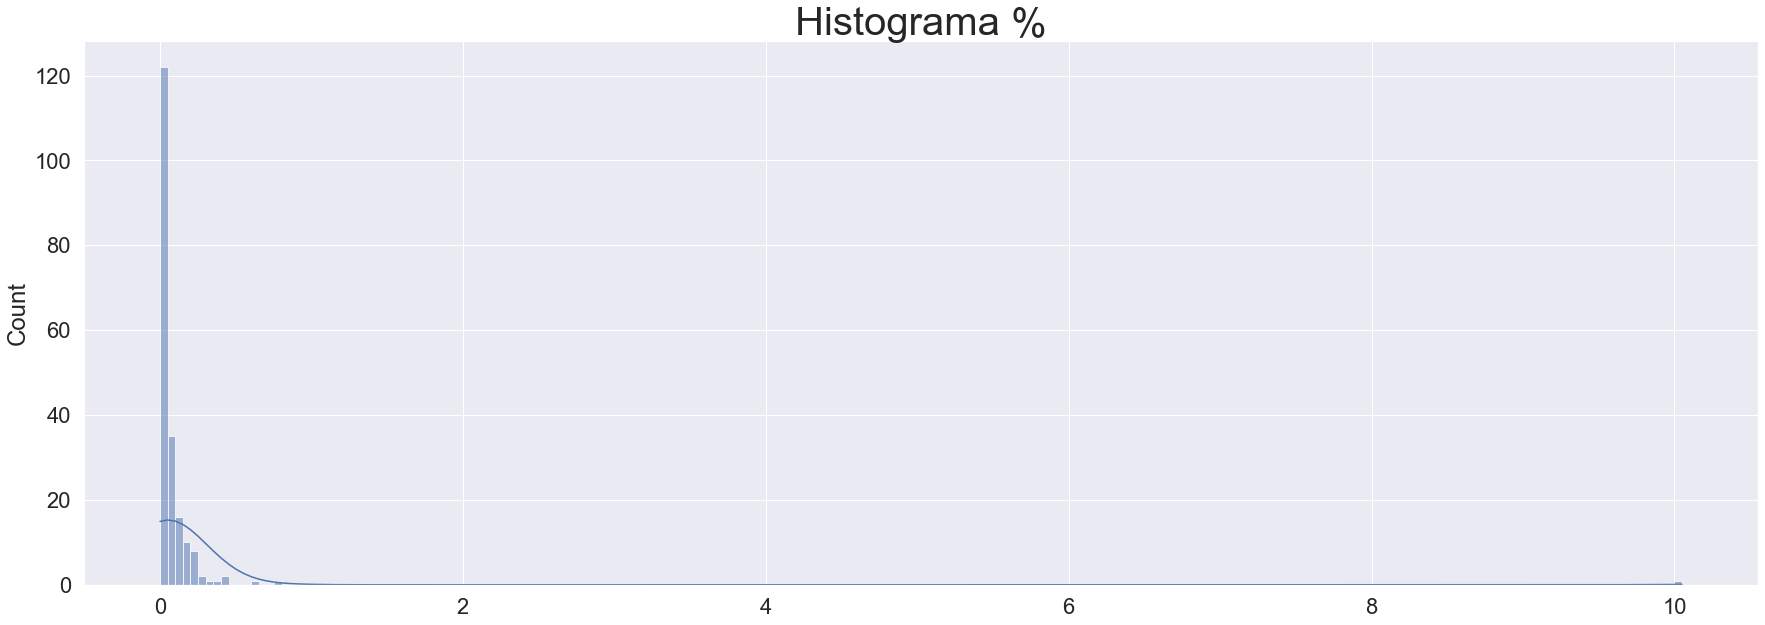

In [280]:
#Calculo el porcentaje de outliers por variable
per_out=[]
for i in outliers:
    per= i/2000
    per_out.append(per)
plt.figure(figsize=(30,10))
sns.set(font_scale = 2)
sns.histplot(per_out, bins=200, kde=True)
plt.title("Histograma %", fontsize=40)
plt.show()

### Se confirma que estas variables son las que más outliers tienen dentro del dataframe, es importante destacar que dentro de target las unicas variables que se encuentran son 0 y 1. Y tanto el Q1 como Q3 son 0 entonces sabemos que existen 20098 "1". Por ultimo, podemos apreciar que el porcentaje de outliers por variable es menor al 1% en la mayoría de ellas
###  Además, pasamos a calcular el máximo valor de outliers según analisis univariado para este caso. Sabiendo que si alguna fila coincide pueden ser menos valores 

In [250]:
sumatoria=0
for i in outliers: #Itero para hacer la sumatoria de outliers por variable
    sumatoria+=i
    
print("La cantidad maxima de outliers puede ser", sumatoria)
    

La cantidad maxima de outliers puede ser 46614


# # Analisis de simetria

In [251]:
df_asimetria=list(df.skew()) #Calculo simetria
print(heapq.nlargest(2,df_asimetria), heapq.nsmallest(2,df_asimetria) ) #Obtengo los extremos

[2.6576420477382454, 0.2674136233473473] [-0.34017215733706146, -0.2380906435475246]


In [252]:
#Busco los indices de cada uno
index_max0=df_asimetria.index(2.6576420477382454)
index_max1=df_asimetria.index(0.2674136233473473)
index_min0=df_asimetria.index(-0.34017215733706146)
index_min1=df_asimetria.index(-0.2380906435475246)
print(index_max0,index_max1,index_min0,index_min1)

0 169 45 94


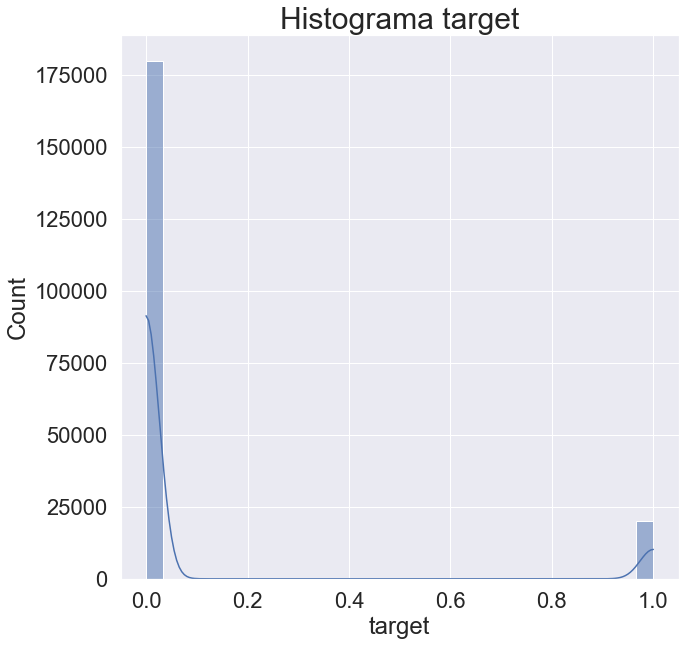

In [277]:
#Grafico histograma de target
plt.figure(figsize=(10,10))
sns.set(font_scale = 2)
sns.histplot(df["target"], bins=30, kde=True)
plt.title("Histograma target", fontsize=30)
plt.show()

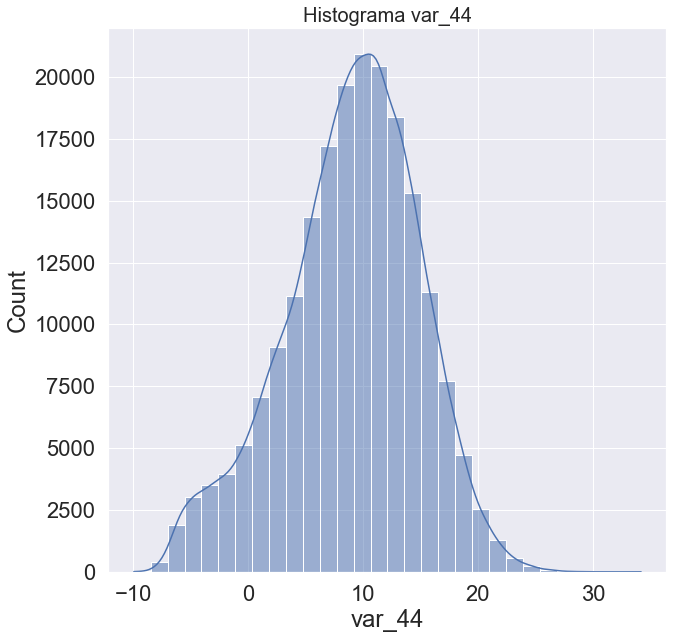

In [278]:
#Grafico histograma del que esta más cercano al extremo -0,34 que es 144
plt.figure(figsize=(10,10))
sns.set(font_scale = 2)
sns.histplot(df["var_44"], bins=30, kde=True)
plt.title("Histograma var_44", fontsize=20)
plt.show()

## Podemos validar que todas las variables son aproximadamente asímetrica ya que si sacamos target se encuentra entre -0.34 y 0.26.
## Además, podemos ver en el histograma anterior que es el "más" asimétrico el resutlado es bastante simétrico

In [1]:
print("prueba")

prueba
